In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import sqlite3

In [5]:
con = sqlite3.connect(r'C:\Users\HP\Desktop\Python Portfolio Projects\Zomato_GeoSpatial Analysis/zomato_rawdata.sqlite')

In [9]:
df = pd.read_sql_query("SELECT * FROM Users",con)

In [10]:
df.shape

(51717, 18)

In [13]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df['rate'].replace(('NEW','-'),np.nan,inplace=True)

In [18]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
"4.1/5".split('/')[0]

'4.1'

In [20]:
type("4.1/5".split('/')[0])

str

In [30]:
float("4.1/5".split('/')[0])

4.1

In [31]:
df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [28]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)
#lambda is annonymous function

In [26]:
#relation betweeen order acceptance and rating

In [33]:
x= pd.crosstab(df['rate'], df['online_order'])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

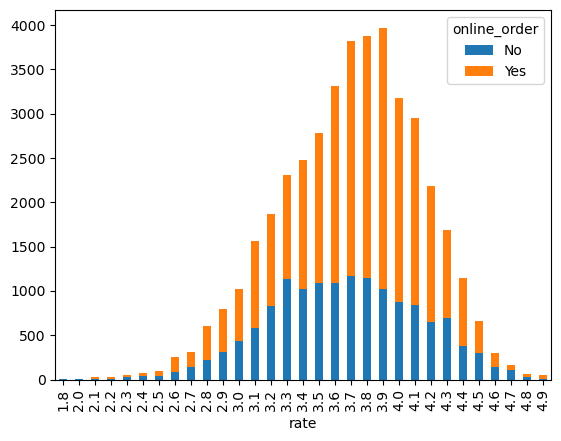

In [34]:
x.plot(kind='bar', stacked=True)

In [37]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [40]:
normalize_df= x.div(x.sum(axis=1).astype(float), axis=0)

In [41]:
normalize_df*100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

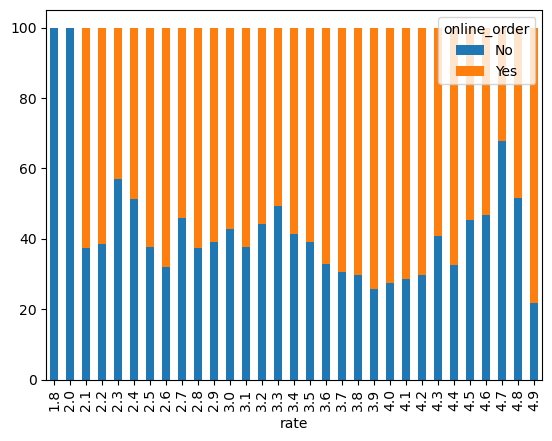

In [42]:
(normalize_df*100).plot(kind='bar', stacked=True)

In [43]:
df['rest_type'].isnull().sum()

227

In [45]:
data = df.dropna(subset=['rest_type'])

In [47]:
data['rest_type'].isnull().sum()

0

In [49]:
data[data['rest_type'].str.contains('Quick Bites')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [50]:
quick_bites_df =data[data['rest_type'].str.contains('Quick Bites')]

In [51]:
quick_bites_df.shape

(20639, 18)

In [52]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [53]:
quick_bites_df['reviews_list']=  quick_bites_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\HP\AppData\Local\Temp\ipykernel_16800\4132899011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list']=  quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [56]:
from nltk.corpus import RegexpTokenizer

In [57]:
tokenizer= RegexpTokenizer("[a-zA-Z]+")

In [58]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [60]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [61]:
sample=data[0:10000]

In [65]:
reviews_tokens=sample['reviews_list'].apply(tokenizer.tokenize)

In [64]:
#Unigram Analysis

In [66]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [71]:
from nltk.corpus import stopwords

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [90]:
stop=stopwords.words('English')

In [91]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [98]:
stop.extend(["rated","n","nan","x","RATED","Rated"])

In [99]:
rev3 = reviews_tokens[3]

In [100]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
rev3

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [102]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [103]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [104]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [106]:
#unigram Analysis p;ck one word and anlyze that

In [112]:
total_reviews_2D = list(reviews_tokens_clean)

In [115]:
total_reviews_1D=[]
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [116]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [117]:
from nltk import FreqDist

In [118]:
fd = FreqDist()

In [119]:
for word in total_reviews_1D:
    fd[word]=fd[word]+1

In [121]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

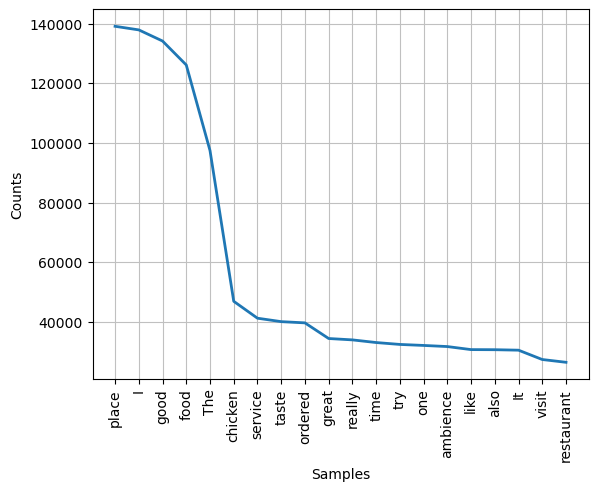

<Axes: xlabel='Samples', ylabel='Counts'>

In [122]:
fd.plot(20)

In [123]:
#Bi Gram and Tri Gram Analysis

In [124]:
from nltk import FreqDist, bigrams, trigrams

In [135]:
bi_grams=bigrams(total_review_1D)

In [136]:
bi_grams

<generator object bigrams at 0x000002AD57C16500>

In [137]:
fd_bigrams =FreqDist()
for bigram in bi_grams:
    fd_bigrams[bigram]=fd_bigrams[bigram] +1

In [138]:
fd_bigrams.most_common(20)

[]

In [139]:
#Geo Spatial Analysis

In [140]:
!pip install geocoder
!pip install geopy

  Obtaining dependency information for geocoder from https://files.pythonhosted.org/packages/4f/6b/13166c909ad2f2d76b929a4227c952630ebaf0d729f6317eb09cbceccbab/geocoder-1.38.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for ratelim from https://files.pythonhosted.org/packages/f2/98/7e6d147fd16a10a5f821db6e25f192265d6ecca3d82957a4fdd592cad49c/ratelim-0.1.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 98.6/98.6 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c25372

In [141]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [144]:
len(df['location'].unique())

94

In [145]:
df['location'] = df['location'] + " ,Bangalore, Karnataka, India "

In [146]:
df['location']

0               Banashankari ,Bangalore, Karnataka, India 
1               Banashankari ,Bangalore, Karnataka, India 
2               Banashankari ,Bangalore, Karnataka, India 
3               Banashankari ,Bangalore, Karnataka, India 
4               Basavanagudi ,Bangalore, Karnataka, India 
                               ...                        
51712             Whitefield ,Bangalore, Karnataka, India 
51713             Whitefield ,Bangalore, Karnataka, India 
51714             Whitefield ,Bangalore, Karnataka, India 
51715    ITPL Main Road, Whitefield ,Bangalore, Karnata...
51716    ITPL Main Road, Whitefield ,Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [147]:
df_copy= df.copy()

In [148]:
df_copy['location'].isnull().sum()

21

In [149]:
df_copy = df_copy.dropna(subset=['location'])

In [150]:
df_copy['location'].isnull().sum()

0

In [152]:
pd.DataFrame(df_copy['location'].unique())

,0
0,"Banashankari ,Bangalore, Karnataka, India"
1,"Basavanagudi ,Bangalore, Karnataka, India"
2,"Mysore Road ,Bangalore, Karnataka, India"
3,"Jayanagar ,Bangalore, Karnataka, India"
4,"Kumaraswamy Layout ,Bangalore, Karnataka, India"
...,...
88,"West Bangalore ,Bangalore, Karnataka, India"
89,"Magadi Road ,Bangalore, Karnataka, India"
90,"Yelahanka ,Bangalore, Karnataka, India"
91,"Sahakara Nagar ,Bangalore, Karnataka, India"


In [153]:
locations = pd.DataFrame(df_copy['location'].unique())

In [155]:
locations.columns =['name']

In [156]:
locations

,name
0,"Banashankari ,Bangalore, Karnataka, India"
1,"Basavanagudi ,Bangalore, Karnataka, India"
2,"Mysore Road ,Bangalore, Karnataka, India"
3,"Jayanagar ,Bangalore, Karnataka, India"
4,"Kumaraswamy Layout ,Bangalore, Karnataka, India"
...,...
88,"West Bangalore ,Bangalore, Karnataka, India"
89,"Magadi Road ,Bangalore, Karnataka, India"
90,"Yelahanka ,Bangalore, Karnataka, India"
91,"Sahakara Nagar ,Bangalore, Karnataka, India"


In [158]:
from geopy.geocoders import Nominatim

In [162]:
geolocator = Nominatim(user_agent='app', timeout =None)

In [165]:
lat=[]
lon=[]
for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [166]:
locations['latitude']= lat
locations['longitude']= lon
locations

,name,latitude,longitude
0,"Banashankari ,Bangalore, Karnataka, India",12.915219,77.573621
1,"Basavanagudi ,Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road ,Bangalore, Karnataka, India",12.946703,77.530070
3,"Jayanagar ,Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout ,Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore ,Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road ,Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka ,Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar ,Bangalore, Karnataka, India",13.062147,77.580061


In [168]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [170]:
locations[locations['latitude'].isnull()]

,name,latitude,longitude
79,"Rammurthy Nagar ,Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar ,Bangalore, Karnataka, India",NaN,NaN


In [171]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [172]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [173]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [174]:
locations[locations['latitude'].isnull()]

,name,latitude,longitude


In [177]:
df['cuisines'].isnull().sum()

45

In [178]:
df= df.dropna(subset=['cuisines'])

In [179]:
df['cuisines'].isnull().sum()

0

In [181]:
df[df['cuisines'].str.contains('North Indian')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari ,Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi ,Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi ,Bangalore, Karnataka, India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield ,Bangalore, Karnataka, India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield ,Bangalore, Karnataka, India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield ,Bangalore, Karnataka, India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield ,Bangalore, Karnataka, India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [184]:
north_india =df[df['cuisines'].str.contains('North Indian')]

In [185]:
north_india.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari ,Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [188]:
north_india['location'].value_counts()

location
BTM ,Bangalore, Karnataka, India                   2469
HSR ,Bangalore, Karnataka, India                   1123
Whitefield ,Bangalore, Karnataka, India            1059
Marathahalli ,Bangalore, Karnataka, India          1038
JP Nagar ,Bangalore, Karnataka, India               958
                                                   ... 
Hebbal ,Bangalore, Karnataka, India                   4
Jakkur ,Bangalore, Karnataka, India                   3
Central Bangalore ,Bangalore, Karnataka, India        2
West Bangalore ,Bangalore, Karnataka, India           1
Peenya ,Bangalore, Karnataka, India                   1
Name: count, Length: 90, dtype: int64

In [207]:
north_india_rest_count= north_india['location'].value_counts().reset_index().rename(columns={'index':'name','location':'name'})

In [208]:
north_india_rest_count

,name,count
0,"BTM ,Bangalore, Karnataka, India",2469
1,"HSR ,Bangalore, Karnataka, India",1123
2,"Whitefield ,Bangalore, Karnataka, India",1059
3,"Marathahalli ,Bangalore, Karnataka, India",1038
4,"JP Nagar ,Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal ,Bangalore, Karnataka, India",4
86,"Jakkur ,Bangalore, Karnataka, India",3
87,"Central Bangalore ,Bangalore, Karnataka, India",2
88,"West Bangalore ,Bangalore, Karnataka, India",1


In [209]:
heatmap_df = north_india_rest_count.merge(locations, on='name', how='left')

In [210]:
heatmap_df

,name,count,latitude,longitude
0,"BTM ,Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR ,Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield ,Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli ,Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar ,Bangalore, Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal ,Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur ,Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore ,Bangalore, Karnataka, India",2,12.973393,77.611234
88,"West Bangalore ,Bangalore, Karnataka, India",1,13.009476,77.553089


In [214]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 262.6 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 365.7 kB/s eta 0:00:01
   ----

In [215]:
import folium
basemap = folium.Map()

In [216]:
basemap

In [217]:
from folium.plugins import HeatMap

In [218]:
HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)

In [219]:
basemap

In [220]:
#How to Perform Automation

In [229]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains('North Indian')]
    cuisine_rest_count= cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name','location':'name'})
    heatmap_df = cuisine_rest_count.merge(locations, on='name', how='left')
    if heatmap_df.isnull() is True:
        heatmap_df.dropna()
    else:
        continue
        print(heatmap_df.head(4))
    
        basemap = folium.Map()
        HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)
        return basemap

SyntaxError: 'continue' not properly in loop (3780165397.py, line 8)

In [227]:
get_heatmap('South Indian')

                                         name  count   latitude  longitude
0           BTM ,Bangalore, Karnataka, India    2469  12.911276  77.604565
1           HSR ,Bangalore, Karnataka, India    1123  12.911623  77.638862
2    Whitefield ,Bangalore, Karnataka, India    1059  12.969637  77.749745
3  Marathahalli ,Bangalore, Karnataka, India    1038  12.955257  77.698416
